## Exploratory Analysis and Visualization of some features on the given dataset 

In [301]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from minepy import MINE

%matplotlib inline

In [3]:
# Read data through CSV
path = './chichester-ppd.csv - chichester-ppd.csv'
Data = pd.read_csv(path)

In [4]:
# checking the first 5 rows of the given dataset
Data.head()

,Price,Transfer_Date,Postcode,Property_Type,Old_New,Duration,Primary_Address,Secondary_Address,Street,Locality,Town_City,District,PP_Type
0,48000,20/02/1995,GU29 9TQ,Apartment,Resale,Leasehold,56,NaN,BARLAVINGTON WAY,MIDHURST,MIDHURST,CHICHESTER,A
1,115000,28/02/1995,PO19 3PY,Apartment,Resale,Leasehold,NORTHLANDS HOUSE,FLAT 5,SALTHILL ROAD,CHICHESTER,CHICHESTER,CHICHESTER,A
2,102500,28/07/1995,PO20 8PX,Detached,Resale,Freehold,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,A
3,53000,24/03/1995,PO20 0TD,Terraced,Resale,Freehold,9,NaN,ST GEORGES CLOSE,SELSEY,CHICHESTER,CHICHESTER,A
4,45000,20/03/1995,PO10 8LZ,Terraced,Resale,Freehold,26,NaN,MANOR WAY,SOUTHBOURNE,EMSWORTH,CHICHESTER,A


In [5]:
# checking the last 5 rows of the given dataset
Data.tail()

,Price,Transfer_Date,Postcode,Property_Type,Old_New,Duration,Primary_Address,Secondary_Address,Street,Locality,Town_City,District,PP_Type
52954,382500,09/01/2018,GU27 3EL,Terraced,Resale,Freehold,6,NaN,THE CYLINDERS,FERNHURST,HASLEMERE,CHICHESTER,A
52955,191500,12/01/2018,PO20 8RJ,Apartment,Resale,Leasehold,47,NaN,WINDMILL COURT,EAST WITTERING,CHICHESTER,CHICHESTER,A
52956,310000,12/01/2018,PO10 8AG,Terraced,Resale,Freehold,11,NaN,LUMLEY GARDENS,NaN,EMSWORTH,CHICHESTER,A
52957,2051000,19/01/2018,PO20 8HH,Detached,Resale,Freehold,1,NaN,MARINE DRIVE WEST,WEST WITTERING,CHICHESTER,CHICHESTER,A
52958,348000,11/01/2018,PO19 7UX,Terraced,Resale,Freehold,9,NaN,ORMONDE AVENUE,NaN,CHICHESTER,CHICHESTER,A


In [6]:
# size/dimensions of the dataframe
print("Shape of dataset=>", Data.shape)

('Shape of dataset=>', (52959, 13))


** Now we know that there are 52959 rows and 13 columns in the dataset **

In [7]:
# printing concise summary of the Data
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52959 entries, 0 to 52958
Data columns (total 13 columns):
Price                52959 non-null int64
Transfer_Date        52959 non-null object
Postcode             52901 non-null object
Property_Type        52959 non-null object
Old_New              52959 non-null object
Duration             52959 non-null object
Primary_Address      52959 non-null object
Secondary_Address    6260 non-null object
Street               50464 non-null object
Locality             41193 non-null object
Town_City            52959 non-null object
District             52959 non-null object
PP_Type              52959 non-null object
dtypes: int64(1), object(12)
memory usage: 5.3+ MB


In [191]:
# Missing data calculation
Total = Data.isnull().sum()
percent = (Data.isnull().sum()/Data.isnull().count())
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values

,Total,Percent
District,0,0.000000
Duration,0,0.000000
Locality,11766,0.222172
Old_New,0,0.000000
PP_Type,0,0.000000
Postcode,58,0.001095
Price,0,0.000000
Primary_Address,0,0.000000
Property_Type,0,0.000000
Secondary_Address,46699,0.881795


** From above we understand that the "Secondary_Address" columns has many missing values(46699), so this feature will not be relevant for predicting price of a house ** 

In [8]:
# Number of columns and list of all columns
print('Number of columns => ', len(Data.columns))
Data.columns


('Number of columns => ', 13)


Index([u'Price', u'Transfer_Date', u'Postcode', u'Property_Type', u'Old_New',
       u'Duration', u'Primary_Address', u'Secondary_Address', u'Street',
       u'Locality', u'Town_City', u'District', u'PP_Type'],
      dtype='object')

In [9]:
# Let's check how the housing price is distributed
print(Data['Price'].describe())

count    5.295900e+04
mean     2.762521e+05
std      3.252215e+05
min      1.000000e+00
25%      1.280000e+05
50%      2.150000e+05
75%      3.250000e+05
max      3.234000e+07
Name: Price, dtype: float64


Text(0.5,1,u'House price distribution')

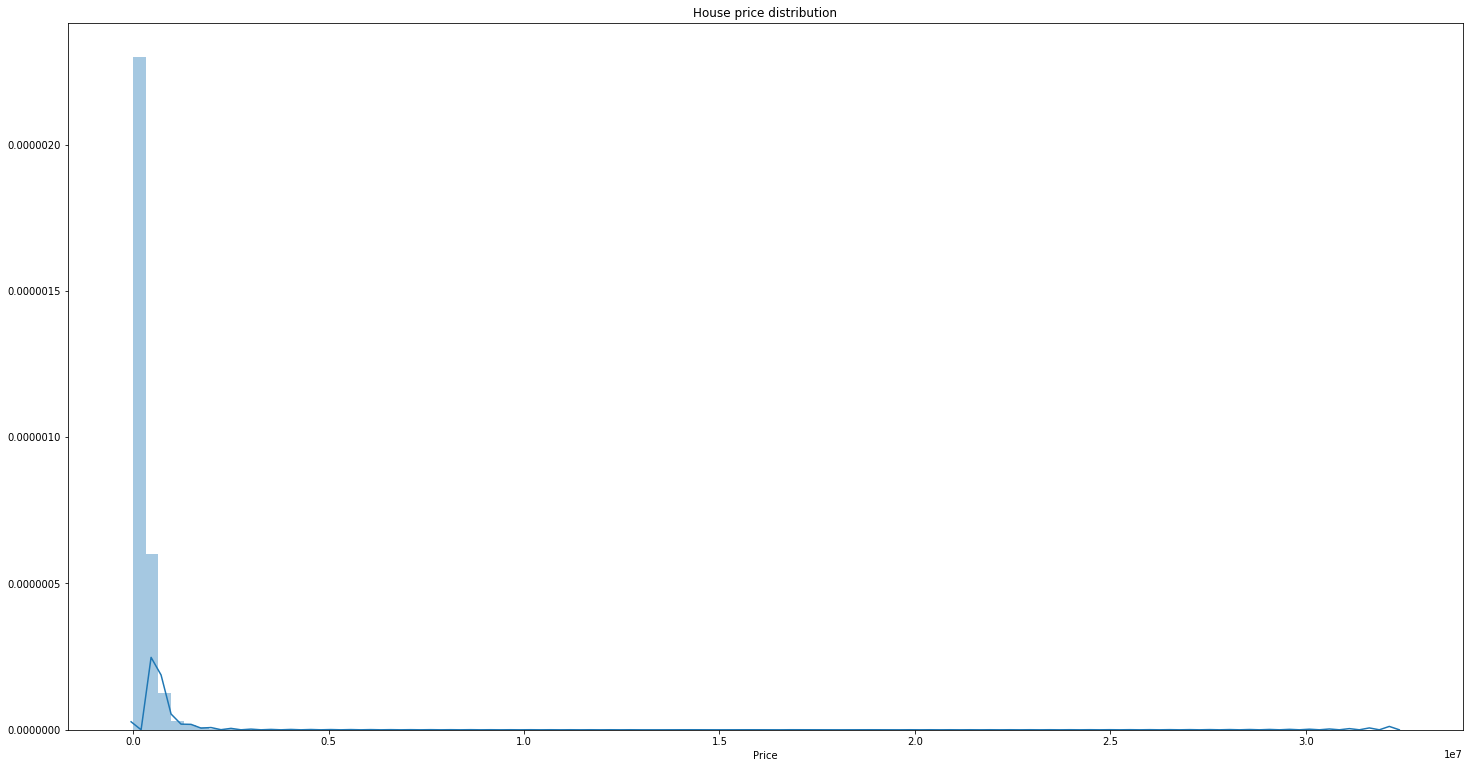

In [126]:
plt.figure(figsize=(25, 13))
sns.distplot(Data['Price'], bins = 100)
plt.title('House price distribution')
# plt.xlim(0,2000000)


** this distribution of price is Right skewed. As mean is greater than mode and median. when the distribution is skewed best way to tell about the central tendancy is Median.**

In [120]:
print('Mean', np.mean(Data['Price']))
print('Median', np.median(Data['Price']))   
print('Mode', stats.mode(Data['Price']))

('Mean', 276252.09756604163)
('Median', 215000.0)
('Mode', ModeResult(mode=array([250000], dtype=int64), count=array([939])))


In [136]:
# skewness and Kurtosis 
print("Skewness: %f" % Data['Price'].skew())
print("Kurtosis: %f" % Data['Price'].kurt())

Skewness: 27.553974
Kurtosis: 2124.356269


In [12]:
# check for count of each type for feature PP_Type
Data['PP_Type'].value_counts()

A    51970
B      989
Name: PP_Type, dtype: int64

In [13]:
# check for count of each type for feature District
Data['District'].value_counts()

CHICHESTER    52959
Name: District, dtype: int64

In [14]:
# check for count of each type for feature Town_City
Data['Town_City'].value_counts()

CHICHESTER          36228
MIDHURST             4315
EMSWORTH             3354
PETWORTH             2358
BILLINGSHURST        2250
HASLEMERE            2234
PETERSFIELD           840
PULBOROUGH            742
LIPHOOK               252
LISS                  207
ROWLAND'S CASTLE       84
GODALMING              45
BOGNOR REGIS           11
CRAWLEY                10
WORTHING                6
ARUNDEL                 4
HORSHAM                 4
EAST GRINSTEAD          3
LITTLEHAMPTON           3
EASTBOURNE              1
CRANLEIGH               1
EASTLEIGH               1
SHOREHAM-BY-SEA         1
HENFIELD                1
BRIGHTON                1
LANCING                 1
HINDHEAD                1
HASSOCKS                1
Name: Town_City, dtype: int64

In [15]:
# check for count of each type for feature Locality
Data['Locality'].value_counts()

CHICHESTER             7801
SELSEY                 6732
WEST WITTERING         1689
BRACKLESHAM BAY        1601
BOSHAM                 1452
MIDHURST               1411
TANGMERE               1410
EAST WITTERING         1319
EMSWORTH               1270
FERNHURST               820
HASLEMERE               693
BIRDHAM                 671
LOXWOOD                 645
WISBOROUGH GREEN        563
HAMBROOK                540
EASEBOURNE              534
PETWORTH                511
IFOLD                   481
SOUTHBOURNE             479
HUNSTON                 441
LAVANT                  387
FITTLEWORTH             382
FISHBOURNE              381
KIRDFORD                347
WESTBOURNE              333
BOXGROVE                314
NUTBOURNE               302
ROGATE                  298
WESTHAMPNETT            297
SIDLESHAM               276
                       ... 
NETHER STREET             2
BARNHAM                   2
LEAHURST COURT ROAD       1
HASSOCKS                  1
HENFIELD            

In [16]:
# check for count of each type for feature Duration
Data['Duration'].value_counts()

Freehold     43756
Leasehold     9203
Name: Duration, dtype: int64

In [17]:
# check for count of each type for feature Property_Type
Data['Property_Type'].value_counts()

Detached         19748
Semi-Detached    12363
Terraced         11797
Apartment         8550
Other              501
Name: Property_Type, dtype: int64

In [18]:
postcode_Val = pd.DataFrame(Data['Postcode'].value_counts())

In [19]:
postcode_Val.shape

(3691, 1)

In [20]:
# check for count of each type for feature Old_New
Data['Old_New'].value_counts()

Resale       47652
New Build     5307
Name: Old_New, dtype: int64

** Countplots for the given features ** 

In [50]:
def countPlot(Data):
    
    """Input is DataFrame.
       sns.countplot() plots count plot with parameters like alpha(Transparency of the image), Rotation(rotates the labels), etc.
       Output is count plots of the categorical features."""
    
    temporary_data = Data[['Property_Type', 'Old_New', 'Town_City', 'PP_Type', 'Duration', 'Postcode']]
    fig, axes = plt.subplots(int(round(len(temporary_data.columns) / 2)), 2, figsize=(12, 10))
    for i, ax in enumerate(fig.axes):
        if i < len(temporary_data.columns):
            ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=90)
            sns.countplot(x=temporary_data.columns[i], alpha=0.7, data=temporary_data, ax=ax)

    fig.tight_layout()
    fig.savefig('figure.png')

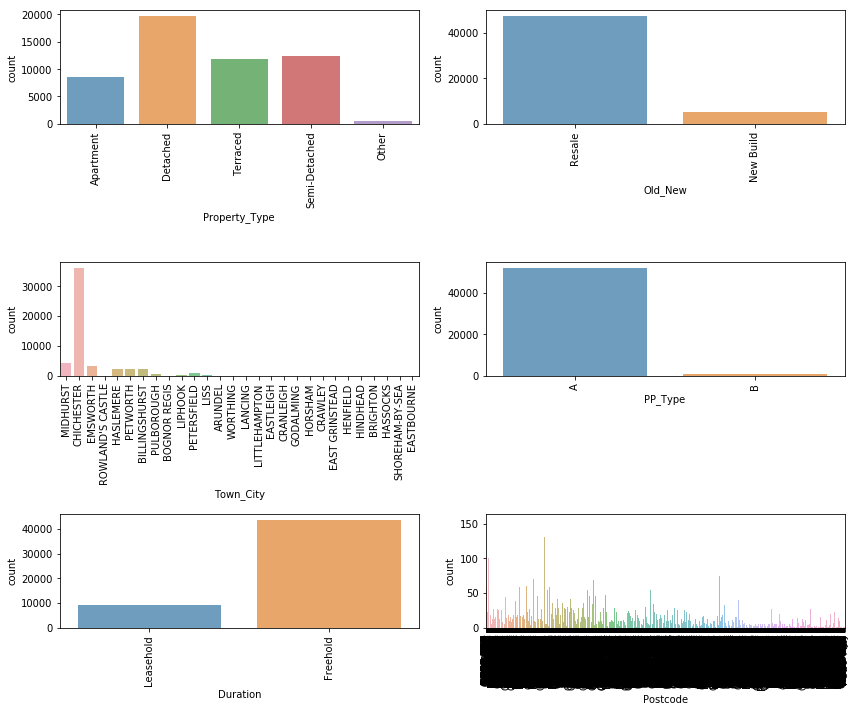

In [51]:
countPlot(Data)

** We see that  category like PP_Type has most of the type A. This may not be relevant for prediction. Postcode feature has lots of categories which can be modified further to include into the prediciton **

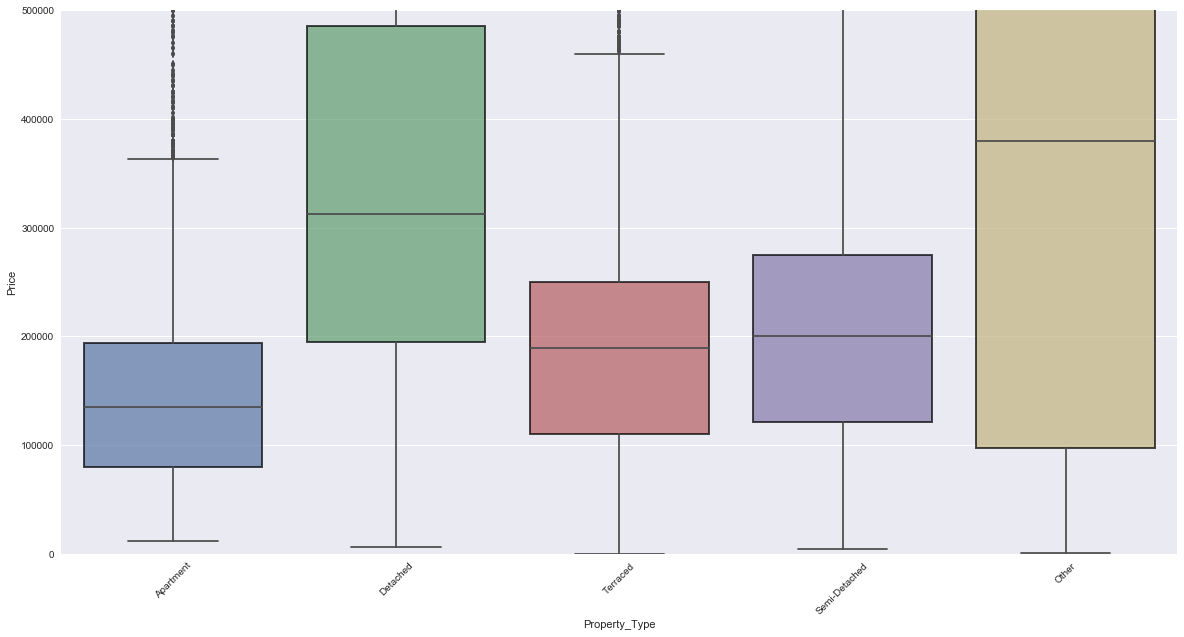

In [306]:
plt.figure(figsize = (20, 10))

ax = sns.boxplot(x='Property_Type', y='Price', data=Data)
plt.setp(ax.artists, alpha=.7, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.ylim(0, 500000)
plt.savefig('Boxplot_property_type_not_zoomed.png')

** Boxplot is good to visualize the distribution of the data and for categorical data. Other type of the Property type his spreaded alot and it has lot of outliers.
For boxplot middle line of the box shows the median value. In comparison to other three values 'Other' and 'Detached' type of property type are more dispered. ** 


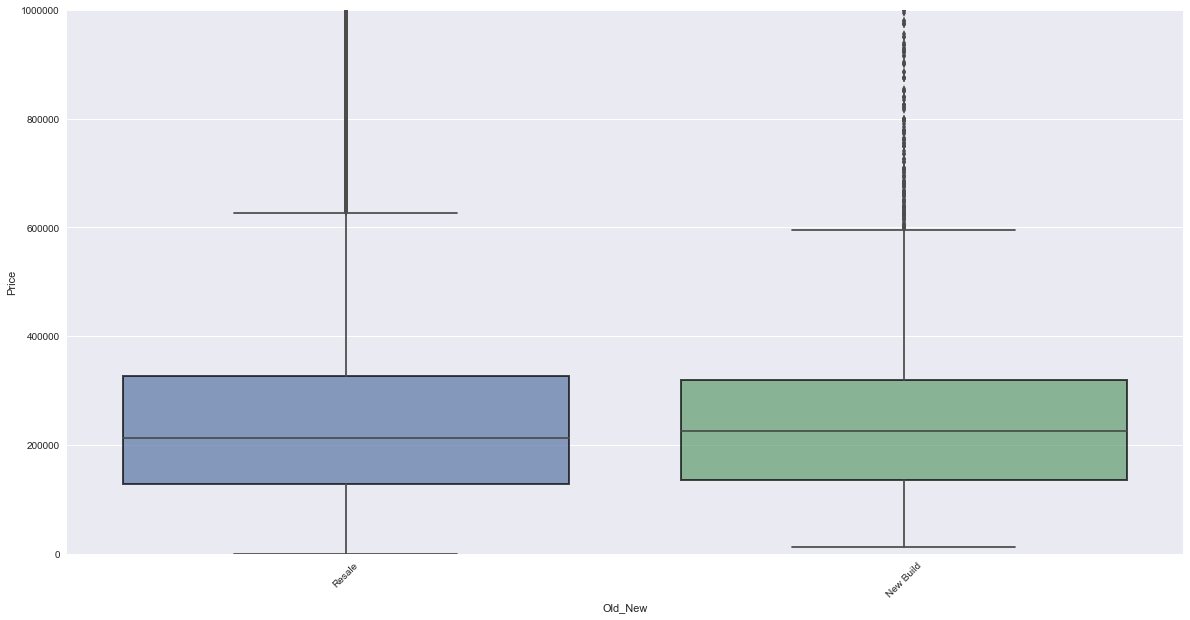

In [307]:
plt.figure(figsize = (20, 10))

ax = sns.boxplot(x='Old_New', y='Price', data=Data)
plt.setp(ax.artists, alpha=.7, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.ylim(0, 1000000)
plt.savefig('Boxplot_Old_New_not_zoomed.png')

In [128]:
# House price of New Build and Resale above the 215000
new_Build = Data[Data.Old_New == 'New Build']
print('New build houses', new_Build.shape)
print('New build houses with price > 215000.0', new_Build[new_Build.Price > 215000.0].shape)
resale = Data[Data.Old_New == 'Resale']
print('Resale houses', resale.shape)
print('Resale houses with price > 215000.0', resale[resale.Price > 215000.0].shape)

('New build houses', (5307, 13))
('New build houses with price > 215000.0', (2815, 13))
('Resale houses', (47652, 13))
('Resale houses with price > 215000.0', (23270, 13))


** In old_New feature there are Resale = 47652 and New Build = 5307 records. From that Records we see that there are lots of houses which are under resale type and very few are new built from the given data. As well as there are many houses which are on freehold. **

In [154]:
# checking how house prices changes year wise
# For that we are extracting the year from the given transfer date and creating new feature called transfer year

In [303]:
def extract_year(date):
    return int(date.split('/')[2])

Data['transfer_year'] = Data['Transfer_Date'].apply(lambda date : extract_year(date))


def extract_month(date):
    return int(date.split('/')[1])

Data['transfer_month'] = Data['Transfer_Date'].apply(lambda date : extract_month(date))

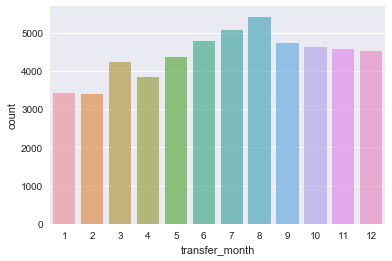

In [304]:
sns.countplot(x=Data['transfer_month'], alpha=0.7, data=Data)

** From above countplot we see that markets are the most active in June, July, August months. **

In [302]:
Data.head()

,Price,Transfer_Date,Postcode,Property_Type,Old_New,Duration,Primary_Address,Secondary_Address,Street,Locality,Town_City,District,PP_Type,transfer_year,transfer_month,postcode_mod,postcode_mod1,postcode_two_char,postcode_four_char
0,48000,20/02/1995,GU29 9TQ,Apartment,Resale,Leasehold,56,NaN,BARLAVINGTON WAY,MIDHURST,MIDHURST,CHICHESTER,A,1995,2,GU,GU29,GU,GU29
1,115000,28/02/1995,PO19 3PY,Apartment,Resale,Leasehold,NORTHLANDS HOUSE,FLAT 5,SALTHILL ROAD,CHICHESTER,CHICHESTER,CHICHESTER,A,1995,2,PO,PO19,PO,PO19
2,102500,28/07/1995,PO20 8PX,Detached,Resale,Freehold,KILMEEN,NaN,BRIAR AVENUE,WEST WITTERING,CHICHESTER,CHICHESTER,A,1995,7,PO,PO20,PO,PO20
3,53000,24/03/1995,PO20 0TD,Terraced,Resale,Freehold,9,NaN,ST GEORGES CLOSE,SELSEY,CHICHESTER,CHICHESTER,A,1995,3,PO,PO20,PO,PO20
4,45000,20/03/1995,PO10 8LZ,Terraced,Resale,Freehold,26,NaN,MANOR WAY,SOUTHBOURNE,EMSWORTH,CHICHESTER,A,1995,3,PO,PO10,PO,PO10


In [305]:
Data.to_csv('data_with_month.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23]), <a list of 24 Text xticklabel objects>)

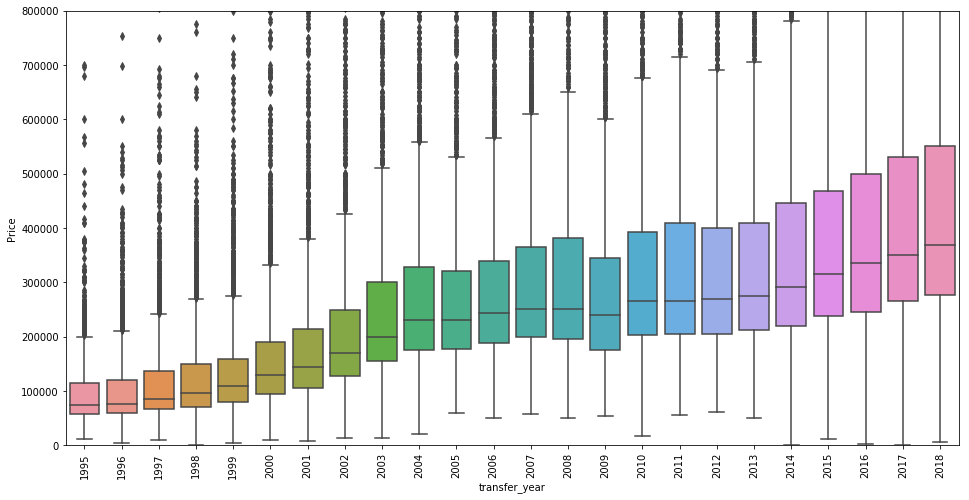

In [172]:
data = pd.concat([Data['Price'], Data['transfer_year']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='transfer_year', y="Price", data=data)
fig.axis(ymin=0, ymax=800000)
plt.xticks(rotation=90)

** This shows that price of houses in chicheste year wise incresed as well as the variations in price increased. There is increasing curve. but in 2009 we see that the decrese in house price **

In [160]:
def extract_year(date):
    return int(date.split('/')[1])


Data_1995 = Data[Data.transfer_year == 1995]
Data_1995['transfer_month'] = Data['Transfer_Date'].apply(lambda date : extract_year(date))

C:\Users\Kishmu\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

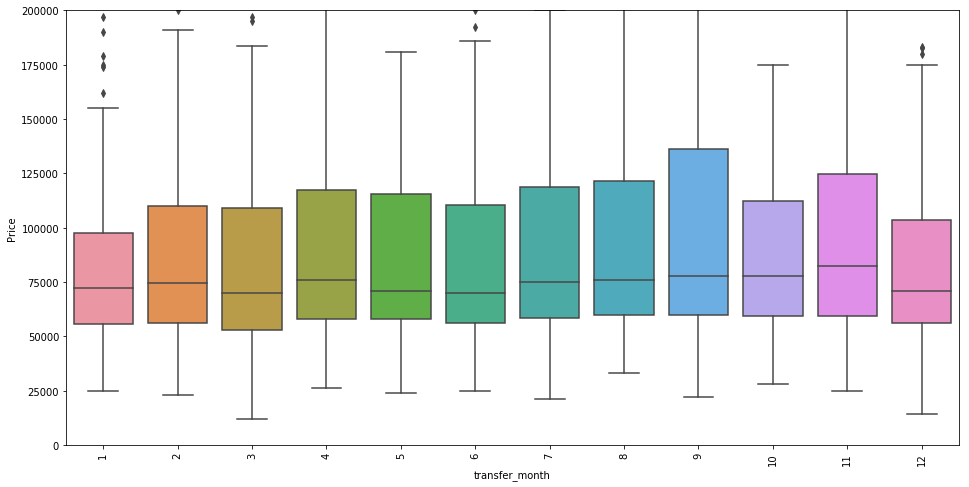

In [174]:
data = pd.concat([Data_1995['Price'], Data_1995['transfer_month']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='transfer_month', y="Price", data=data)
fig.axis(ymin=0, ymax=200000)
plt.xticks(rotation=90)

** We wanted to check what is the trend in prices of house depending on the month. For that we choose data of 1995 year and checked each month how the data is distributed. In september 1995 there is large variation in the prices.
we see that there is not significant variation across the months in 1995 in the house price**

In [165]:
def extract_year(date):
    return int(date.split('/')[1])


Data_2017 = Data[Data.transfer_year == 2017]
Data_2017['transfer_month'] = Data['Transfer_Date'].apply(lambda date : extract_year(date))

C:\Users\Kishmu\Anaconda2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


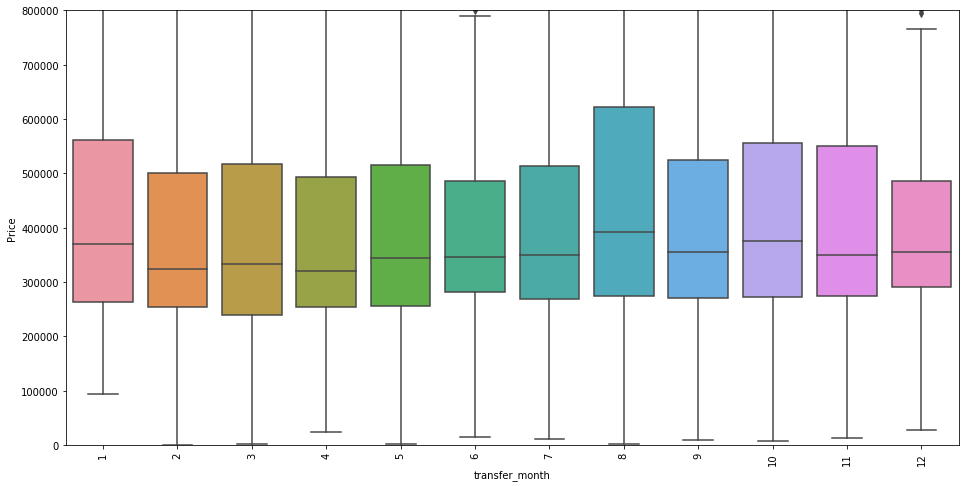

In [176]:
data = pd.concat([Data_2017['Price'], Data_2017['transfer_month']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='transfer_month', y="Price", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

** There is not that much fluctations month wise**

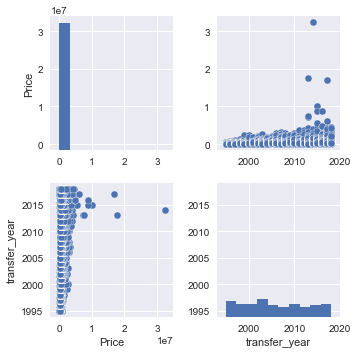

In [183]:
#scatterplot
sns.set()
cols = ['Price', 'transfer_year']
sns.pairplot(Data[cols], size = 2.5)
plt.show();

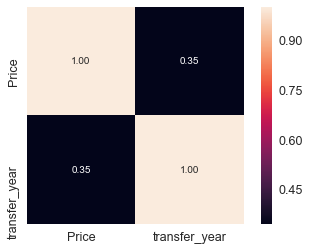

In [178]:
#saleprice correlation matrix
corrmat = Data.corr()
k = 13 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Price')['Price'].index
cm = np.corrcoef(Data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

** Creating new columns with postcode information **

In [296]:
def extract_postcode(code):
    """Input is the postcode in string format. Output is taking only first 2 characters of the postcode"""
    if not pd.isnull(code):
        return(code[0] + code[1])
    
Data['postcode_two_char'] = Data['Postcode'].apply(lambda code:extract_postcode(code))


In [299]:
Data['postcode_two_char'].value_counts()

PO    39647
GU    10228
RH     3006
BN       19
SO        1
Name: postcode_two_char, dtype: int64

In [297]:
def extract_four_char_postcode(code):
    """Input is the postcode in string format. Output is taking only first 3 or 4 characters of the postcode"""
    if not pd.isnull(code):
        return code.split(' ')[0]
    
Data['postcode_four_char'] = Data['Postcode'].apply(lambda code:extract_four_char_postcode(code))
    

In [298]:
Data['postcode_four_char'].value_counts()

PO20    15634
PO19    15446
PO18     5119
GU29     4315
PO10     3352
GU28     2347
RH14     2248
GU27     2223
GU31      839
RH20      741
GU30      251
GU33      207
PO9        84
GU8        44
PO22        7
RH11        7
BN18        4
RH13        4
PO21        4
RH19        3
BN14        3
RH10        3
BN11        2
BN16        2
PO16        1
BN17        1
BN15        1
BN12        1
BN41        1
BN20        1
BN43        1
BN6         1
BN5         1
GU6         1
GU26        1
SO50        1
Name: postcode_four_char, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]), <a list of 36 Text xticklabel objects>)

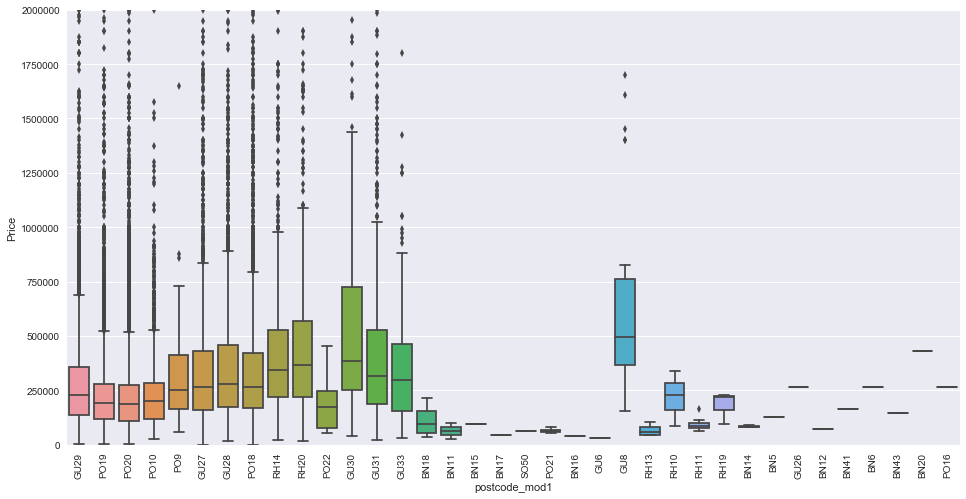

In [282]:
data = pd.concat([Data['Price'], Data['postcode_mod1']], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x='postcode_mod1', y="Price", data=data)
fig.axis(ymin=0, ymax=2000000)
plt.xticks(rotation=90)

** From above graph we see GU30 and GU8 has high prices of house.**

In [300]:
Data.to_csv('new_chichester_data.csv')